### 유투브 긍정부정 전처리

In [2]:
import pandas as pd

df = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_crawling.csv")

In [3]:
df

,comment_text,likes
0,안녕하세요 현재 주방직원으로 일 하고 있습니다. 지점은 말씀드리기 그렇습니다. 이유...,5.6만
1,홍콩반점 담당부서가 제일 일 못한거라고 봐요. 홍콩반점 안좋은 소리가 나온지 얼마나...,2.4만
2,담당자 ㅈㄴ 부럽다 몇년동안 꿀빤거냐 대체,1.5천
3,홍콩반점 너무좋아하는데 제가 주문하는 지점은 전부 점주님들이 노력 엄청하시는곳이였군...,752
4,"점주라면 이 영상 분명히 볼텐데, 잘 하는 집은 다 알면서도 책자 한 번 더 들여다...",6.2천
...,...,...
1264,짜장밥 홍보 같은데,NaN
1265,저말빨 이기기 힘들어 창업자 당신들만 잘못이지 체인점 관리. 안해놓고 그냥 백돼지 ...,NaN
1266,음식만들면서 돈벌어 지적하면서 영상으로 돈벌어 그냥 계속 돈돈돈이구만,NaN
1267,잘하는집 상을 주는것도아니고 자기돈 내고 가맹점하는건데 왜 잔소리하는거지.?,NaN


In [10]:
# 프롬프트 역할부여하기

In [11]:
def request_chat_completion(prompt):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "당신은 고객 반응 전문 분석가입니다."},
            {"role": "user", "content": prompt}
        ],
        stream = False
    )
    return response.choices[0].message.content

In [16]:
request_chat_completion(prompt)

'-1'

In [20]:
print(response.choices[0].message.content)

AttributeError: 'str' object has no attribute 'choices'

In [21]:
def generate_prompt(comment):
    prompt = f"""
홍콩반점 영상에 관한 댓글 리스트가 주어져. 댓글의 고객의 감정을 문맥을 파악해서 대답해.
대답은 다른 추가적인 설명 없이 '긍정'인 경우 '1', 중립은 '0','부정'은 '-1'로 대답해줘.

---
리뷰: {comment}
---
""".strip()
    return prompt

In [22]:
# 테스트

In [23]:
prompt = generate_prompt(
    comment= df["comment_text"][2]
)

In [24]:
response = request_chat_completion(prompt)

In [31]:
# 100개 테스트 샘플
df = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_crawling.csv")

df_comment_sample = df[101:]

def commentloader():
    results = []
    for index, row in df_comment_sample.iterrows():
        comment = row["comment_text"]
        prompt = generate_prompt(comment)
        sentiment = request_chat_completion(prompt)
        results.append(sentiment.strip())
    return results

In [32]:
sentiments = commentloader()

In [33]:
df_comment_sample['classification_result'] = sentiments

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1338/491622390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_sample['classification_result'] = sentiments


In [34]:
df_comment_sample.to_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_comment_sentiments2.csv", index=False)

In [78]:
import pandas as pd

df = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_comment_sentiments.csv")

In [80]:
df

,comment_text,likes,classification_result
0,안녕하세요 현재 주방직원으로 일 하고 있습니다. 지점은 말씀드리기 그렇습니다. 이유...,5.6만,-1
1,홍콩반점 담당부서가 제일 일 못한거라고 봐요. 홍콩반점 안좋은 소리가 나온지 얼마나...,2.4만,-1
2,담당자 ㅈㄴ 부럽다 몇년동안 꿀빤거냐 대체,1.5천,-1
3,홍콩반점 너무좋아하는데 제가 주문하는 지점은 전부 점주님들이 노력 엄청하시는곳이였군...,752,1
4,"점주라면 이 영상 분명히 볼텐데, 잘 하는 집은 다 알면서도 책자 한 번 더 들여다...",6.2천,0
...,...,...,...
96,내가 나를 디스한다 ㅋㅋㅋㅋ 이런 컨텐츠 쉽지 않았을텐데 오히려 신뢰가 가고 너무 ...,667,1
97,백종원님의 프랜차이즈는 맛없다는 말이 많아서 안 먹는데 이번에 한 번 아니고 두 번...,1,-1
98,중식집은 그냥 주변에 꾸준히 배달가는 오래된 곳에서 먹는 게 제일이야.. 괜히 오래...,2,0
99,이렇게라도 해결하려는 행동을 보여주셔서 좋네요\n홍콩반점 거의 매주 가던 단골이었는...,681,0


In [81]:
df2 = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_comment_sentiments2.csv")

In [83]:
result = pd.concat([df, df2])

In [85]:
result.to_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_comment_sentiments_final.csv", index=False)

### 유투브 컨텐츠 시각화

In [86]:
import pandas as pd

df = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_comment_sentiments_final.csv")

In [91]:
pd.set_option('display.max_rows', None)

In [100]:
df = df.loc[df['comment_text'] != '답글']

In [109]:
df.loc[(df['classification_result']== '1  \n1  \n0  \n-1'),'classification_result'] = '-1'

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1338/3198783609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['classification_result']== '1  \n1  \n0  \n-1'),'classification_result'] = '-1'


In [119]:
df.loc[[27,41,45,53,60,70,89,90,91,99,136], 'classification_result'] = '1'

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1338/806751963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[[27,41,45,53,60,70,89,90,91,99,136], 'classification_result'] = '1'


In [122]:
df.loc[[137,155,157,166,168,215,223,225,231,233,274,278,281], 'classification_result'] = '1'

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1338/2051126227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[[137,155,157,166,168,215,223,225,231,233,274,278,281], 'classification_result'] = '1'


In [126]:
df.loc[[305,309,313,316,319,366,378,409,436,437,468,454,473,488,491,504,554,646,681,782,871,713,719], 'classification_result'] = '1'

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1338/1573289702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[[305,309,313,316,319,366,378,409,436,437,468,454,473,488,491,504,554,646,681,782,871,713,719], 'classification_result'] = '1'


In [127]:
df.loc[(df['classification_result']=='0')]

,comment_text,likes,classification_result
4,"점주라면 이 영상 분명히 볼텐데, 잘 하는 집은 다 알면서도 책자 한 번 더 들여다...",6.2천,0
15,사람들이 이렇게 관심 보일때 더 잘해야되는듯.. 아예 관심마저 없는 상황까지 가버리...,122,0
16,홍콩반점이 맛없는건 아닌데 점바점이 너무 강함. 아무리 백대표님이 심혈을 기울여 만...,2천,0
23,저는 백종원님을 좋아하는데\n홍콩반점은 여러번 실망해서\n사실 잘 안 시켜 먹습니다...,8,0
26,이게 맞지. 안그래도 백종원님이 다른 가게 피드백해주는거보면서 좀 안타까웠음. 정작...,107,0
31,홍콩반점 3-4년전에 딱 한번 가보고 밀키트 인스턴트 같은 느낌이라서 두번다시 안갔...,68,0
34,영상보고 최근에 시켜먹어봤는데\n짜장면 절반정도 먹으니 너무 달더라...\n단맛이 ...,19,0
39,헐 공감갔어요 \n저도 인천 어디지점 짜장면 배달 시켰는게 \n면도 붙어있고 밀가루...,37,0
66,아진짜! 홍콩반점 어디라곤 말 못하겠는데 어느 대학가 근처 지점은 진짜 너무 맛없고...,NaN,0
87,이 얘기도 진짜 4 5년된 얘기아닌가? ㅋㅋㅋㅋ\n이제야 지점 관리하려는것도 대단하...,709,0


In [130]:
df.to_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/youtube_comment_sentiments_final1.csv")

<Axes: xlabel='classification_result', ylabel='count'>

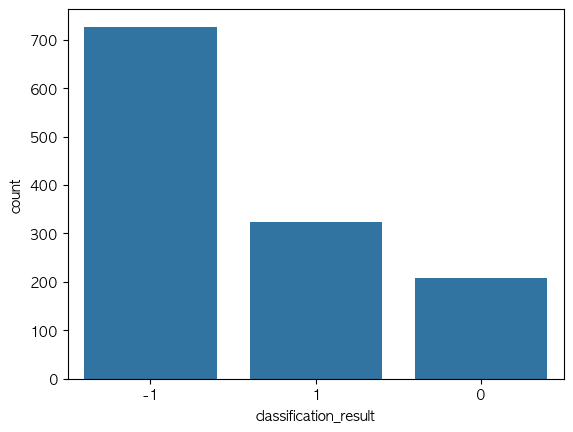

In [129]:
#컨텐츠 댓글 감정분포
import matplotlib as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
sns.countplot(
    x = "classification_result",
    data = df
)